In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# We'll need to update our path to import from Drive.
import sys
sys.path.append('/content/drive/MyDrive')

## Importar librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
from scipy.signal import butter, lfilter, find_peaks
from sklearn import decomposition


In [ ]:
!pip install mne
import mne

     |████████████████████████████████| 6.9 MB 8.4 MB/s 


## Levantar dataset

In [ ]:
filename = '/content/drive/MyDrive/procesados/suj_8_bl_2.txt'
datos = pd.read_csv(filename, sep=',', header=None)
EEGdata = datos.to_numpy()
srate=128
ch    = EEGdata.shape[0]
samples = EEGdata.shape[1] 

inicio = 1
fin    = int(samples/srate)

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEGdata.shape[1], EEGdata.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


In [ ]:
# Montage 10-20
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Elijo canales que tengo
kept_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 
                 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2',
                 'FC5', 'FC6','CP1','CP2','CP5','CP6','AFz','Fpz','POz']

ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_30 = mont1020.copy()
# Me quedo solo con los canales seleccionados
mont1020_30.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]
# Me quedo con las referencias desde dónde están ubicados los canales
mont1020_30.dig = mont1020.dig[0:3]+kept_channel_info
info_eeg = mne.create_info(ch_names=mont1020_30.ch_names, sfreq=128,
                            ch_types='eeg').set_montage(mont1020_30)

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
# Sample rate and desired cutoff frequencies (in Hz).
def apply_filter(EEGdata):
  lowcut = 2
  highcut = 20
  order = 6
  EEGdata_filt = np.zeros_like(EEGdata)
  for i,temp_canal in enumerate(EEGdata):
    EEGdata_filt[i,:] = butter_bandpass_filter(temp_canal, lowcut, highcut, srate, order)

  return EEGdata_filt

### Topologia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


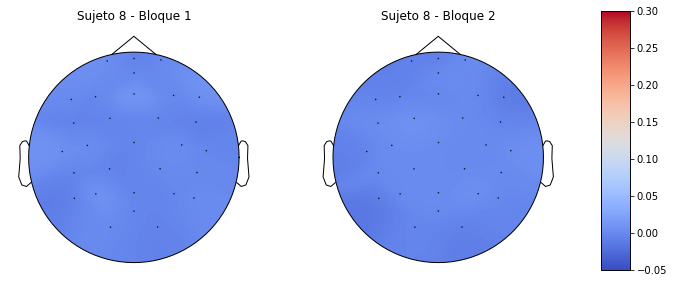

diferencia en distancia euclediana de los promedios: 0.02958
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


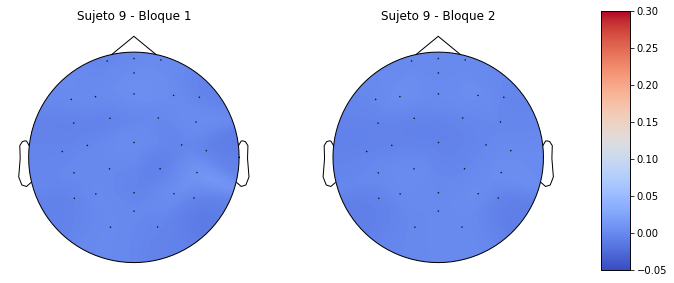

diferencia en distancia euclediana de los promedios: 0.01555
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


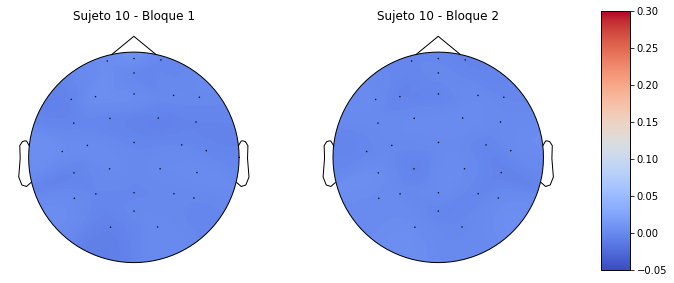

diferencia en distancia euclediana de los promedios: 0.02446
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


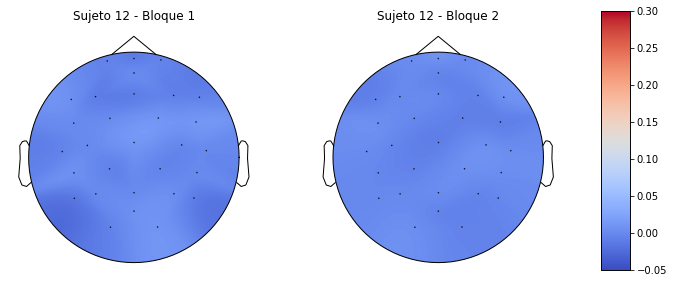

diferencia en distancia euclediana de los promedios: 0.05394
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


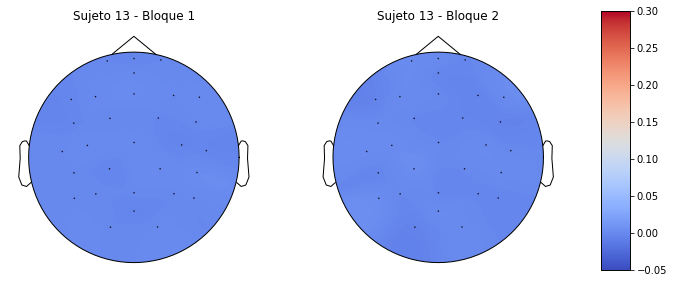

diferencia en distancia euclediana de los promedios: 0.01341
----------------------------------------------------------------------------------------------


In [ ]:
# PUNTO 02
for sujeto in [8, 9, 10, 12, 13]:
  promedios = []
  fig, axs = plt.subplots(
                        nrows=1, 
                        ncols=2, 
                        figsize=(10, 4), 
                        # gridspec_kw=dict(top=0.9),
                        # sharex=True, 
                        # sharey=True
                        )
  for act in [1, 2]:
    ax = axs[act-1]
    filename = f'/content/drive/MyDrive/procesados/suj_{sujeto}_bl_{act}.txt'

    datos = pd.read_csv(filename, sep=',', header=None)
    EEGdata = datos.to_numpy()
    
    ## Aplico filtros
    EEGdata = apply_filter(EEGdata)

    promedios.append(EEGdata[:,inicio*srate:fin*srate].mean(axis=1))
    
    im,cm   = mne.viz.plot_topomap(EEGdata[:,inicio*srate:fin*srate].mean(axis=1),
                                   info_eeg,
                                   axes=ax,
                                   vmin=-0.05,
                                   vmax=0.3,
                                   cmap='coolwarm', 
                                   contours=0, 
                                   show=False)
    
    ax.set_title(f"Sujeto {sujeto} - Bloque {act}")
    ax_x_start = 0.95
    ax_x_width = 0.04
    ax_y_start = 0.1
    ax_y_height = 0.9
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
  plt.show()

  dist = np.linalg.norm(promedios[0]-promedios[1])
  print(f"diferencia en distancia euclediana de los promedios: {round(dist, 5)}")
  print("----------------------------------------------------------------------------------------------")

### PCA

Calcular las componentes principales para el total de los datos (concatenados en el tiempo). ¿Qué peso tiene cada proyección en los distintos períodos de reposo? 


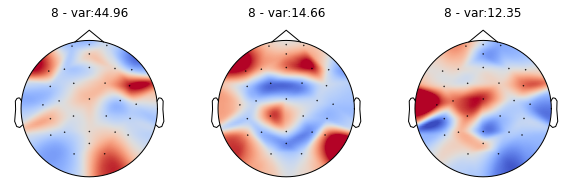

Sujeto: 8
pca.components_[0]
Suma componentes, 1°: -0.08200338665983979, 2°: 0.08623297812713362
Media componentes, 1°: -2.1716998585762657e-05, 2°: 2.283712344468581e-05
----------------------------------------------------------------------------------------------
pca.components_[1]
Suma componentes, 1°: -0.07900565411948252, 2°: 0.030587170526749557
Media componentes, 1°: -2.0923107552829055e-05, 2°: 8.100415923397659e-06
----------------------------------------------------------------------------------------------
pca.components_[2]
Suma componentes, 2°: -0.005211181700469608, 2°: -0.002076441329135509
Media componentes, 2°: -1.3800798994887733e-06, 2°: -5.499050130125818e-07
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


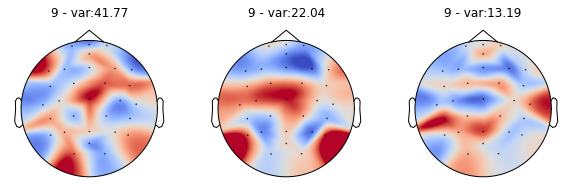

Sujeto: 9
pca.components_[0]
Suma componentes, 1°: 0.012361890846144252, 2°: -0.025487266995983943
Media componentes, 1°: 3.273805838491592e-06, 2°: -6.749805878173713e-06
----------------------------------------------------------------------------------------------
pca.components_[1]
Suma componentes, 1°: -0.045185244144413286, 2°: -0.041503862598209235
Media componentes, 1°: -1.196643118231284e-05, 2°: -1.09914890355427e-05
----------------------------------------------------------------------------------------------
pca.components_[2]
Suma componentes, 2°: 0.03356044749766528, 2°: -0.03071507684962318
Media componentes, 2°: 8.887830375441017e-06, 2°: -8.134289419921394e-06
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


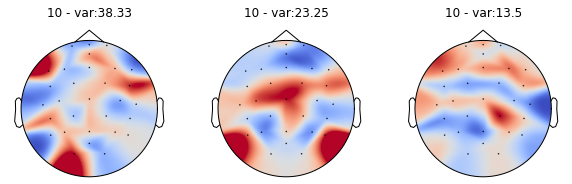

Sujeto: 10
pca.components_[0]
Suma componentes, 1°: 0.001631702228973915, 2°: 0.03210306691605253
Media componentes, 1°: 4.321245309782614e-07, 2°: 8.501871534971538e-06
----------------------------------------------------------------------------------------------
pca.components_[1]
Suma componentes, 1°: 0.05492455484016293, 2°: -0.012020107879252576
Media componentes, 1°: 1.45456977860601e-05, 2°: -3.1832912815817203e-06
----------------------------------------------------------------------------------------------
pca.components_[2]
Suma componentes, 2°: -0.0888888260900608, 2°: 0.06616161279665696
Media componentes, 2°: -2.3540473011138983e-05, 2°: 1.7521613558436693e-05
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


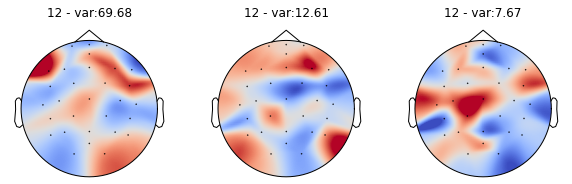

Sujeto: 12
pca.components_[0]
Suma componentes, 1°: -0.008290728458392856, 2°: -0.03880965139514109
Media componentes, 1°: -2.1956378332608198e-06, 2°: -1.0277979712696263e-05
----------------------------------------------------------------------------------------------
pca.components_[1]
Suma componentes, 1°: -0.001913168486558578, 2°: 0.030219427459824463
Media componentes, 1°: -5.066653830928438e-07, 2°: 8.003026339995885e-06
----------------------------------------------------------------------------------------------
pca.components_[2]
Suma componentes, 2°: -0.09084148039529488, 2°: 0.05124958416462264
Media componentes, 2°: -2.4057595443669195e-05, 2°: 1.3572453433427607e-05
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


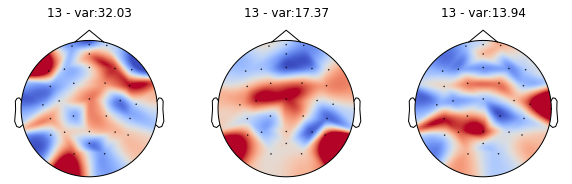

Sujeto: 13
pca.components_[0]
Suma componentes, 1°: 0.0885134790524015, 2°: -0.20819212081002159
Media componentes, 1°: 2.3441069664301246e-05, 2°: -5.513562521451843e-05
----------------------------------------------------------------------------------------------
pca.components_[1]
Suma componentes, 1°: 0.127433847747827, 2°: -0.10953752152493662
Media componentes, 1°: 3.374837069592876e-05, 2°: -2.9008877522493808e-05
----------------------------------------------------------------------------------------------
pca.components_[2]
Suma componentes, 2°: -0.005943396336859821, 2°: -0.024542898006104458
Media componentes, 2°: -1.5739926739565205e-06, 2°: -6.499708158396308e-06
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


In [ ]:
# Punto 03
for sujeto in [8, 9, 10, 12, 13]:
  filename = f"/content/drive/MyDrive/procesados/suj_{sujeto}_bl_{act}.txt"
  datos1 = pd.read_csv(filename.format(sujeto=sujeto, act=1), sep=',', header=None)
  datos2 = pd.read_csv(filename.format(sujeto=sujeto, act=2), sep=',', header=None)
  EEGdata1 = datos1.to_numpy()
  EEGdata2 = datos2.to_numpy()

  srate=128
  ch    = EEGdata1.shape[0]
  samples = EEGdata1.shape[1] 

  EEGdata1 = apply_filter(EEGdata1)
  EEGdata2 = apply_filter(EEGdata2)

  EEGdata_filt_sum = EEGdata1[:,inicio*srate:fin*srate] + EEGdata2[:,inicio*srate:fin*srate]

  pca = decomposition.PCA(n_components=3)
  pca.fit(EEGdata_filt_sum)
  pcs = pca.transform(EEGdata_filt_sum)
  var = pca.explained_variance_ratio_
  fig2, ax = plt.subplots(ncols=pcs.shape[1], figsize=(10, 3), gridspec_kw=dict(top=0.9),
                        sharex=True, sharey=True)
  for p in range(pcs.shape[1]):
    mne.viz.plot_topomap(pcs[:,p],
                      info_eeg,
                      cmap='coolwarm', contours=0,
                      axes=ax[p],show=False)
    ax[p].set_title(str(sujeto) + ' - var:'+str(round(var[p]*100,2)) )   
  plt.show()
  
  print(f"Sujeto: {sujeto}")
  print("pca.components_[0]")
  componente_0 = pca.components_[0]
  print(f"Suma componentes, 1°: {componente_0[len(componente_0 )//2:].sum()}, 2°: {componente_0[:len(componente_0)//2].sum()}" )
  print(f"Media componentes, 1°: {componente_0[len(componente_0 )//2:].mean()}, 2°: {componente_0[:len(componente_0)//2].mean()}" )
  print("----------------------------------------------------------------------------------------------")
  print("pca.components_[1]")
  componente_1 = pca.components_[1]
  print(f"Suma componentes, 1°: {componente_1[len(componente_1 )//2:].sum()}, 2°: {componente_1[:len(componente_1)//2].sum()}" )
  print(f"Media componentes, 1°: {componente_1[len(componente_1 )//2:].mean()}, 2°: {componente_1[:len(componente_1)//2].mean()}" )
  print("----------------------------------------------------------------------------------------------")
  print("pca.components_[2]")
  componente_2 = pca.components_[2]
  print(f"Suma componentes, 2°: {componente_2[len(componente_2 )//2:].sum()}, 2°: {componente_2[:len(componente_2)//2].sum()}" )
  print(f"Media componentes, 2°: {componente_2[len(componente_2 )//2:].mean()}, 2°: {componente_2[:len(componente_2)//2].mean()}" )
  print("----------------------------------------------------------------------------------------------")
  print("----------------------------------------------------------------------------------------------")


In [ ]:
# 3 componentes
# len(pca.components_)
# 7552 'features' que corresponden a cada fragmento de tiempo
len(pca.components_[0])

7552

### Campo de Potencia Global

Encontrar los picos del GFP. Guardar los vectores del GFP para los máximos encontrados.



In [ ]:
def get_GFP(EEGdata):
  ch = EEGdata.shape[0]

  res = np.zeros_like(EEGdata[0, :])
  
  promx = EEGdata.mean(axis = 0) # prom vertical (en serie de tiempo)
  for channel in range(0, ch):
    diff = np.subtract(EEGdata[channel,:],promx) # restamos a c/instante de tiempo el promedio vertical
    diffPow = np.power(diff, 2)

    res=np.add(diffPow,res) # sumamos el valor de la dif en la serie de tiempo de cada channel

  # una vez sumados todos los valores de los channels a lo largo de la serie de tiempo, dividimos por el total de channels
  res=res/ch
  res=np.sqrt(res)
  return res

Sujeto: 8

 Período: 1


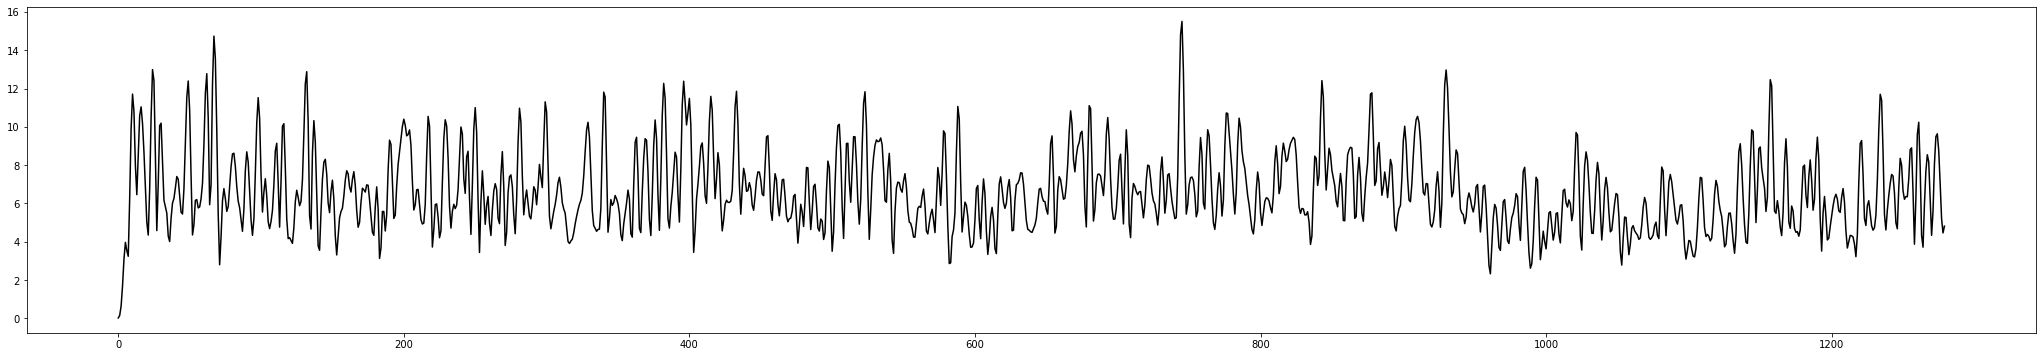

Cant peaks: 1272
(array([   5,   10,   16, ..., 7666, 7671, 7676]), {})
Sujeto: 9

 Período: 1


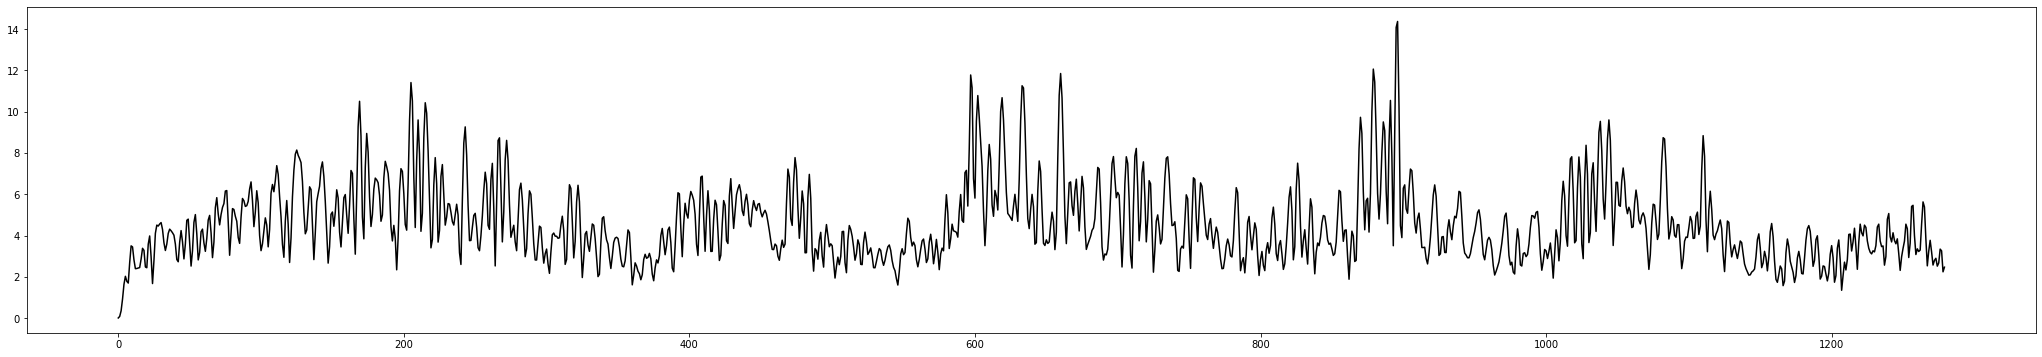

Cant peaks: 1374
(array([   5,    9,   17, ..., 7666, 7670, 7675]), {})
Sujeto: 10

 Período: 1


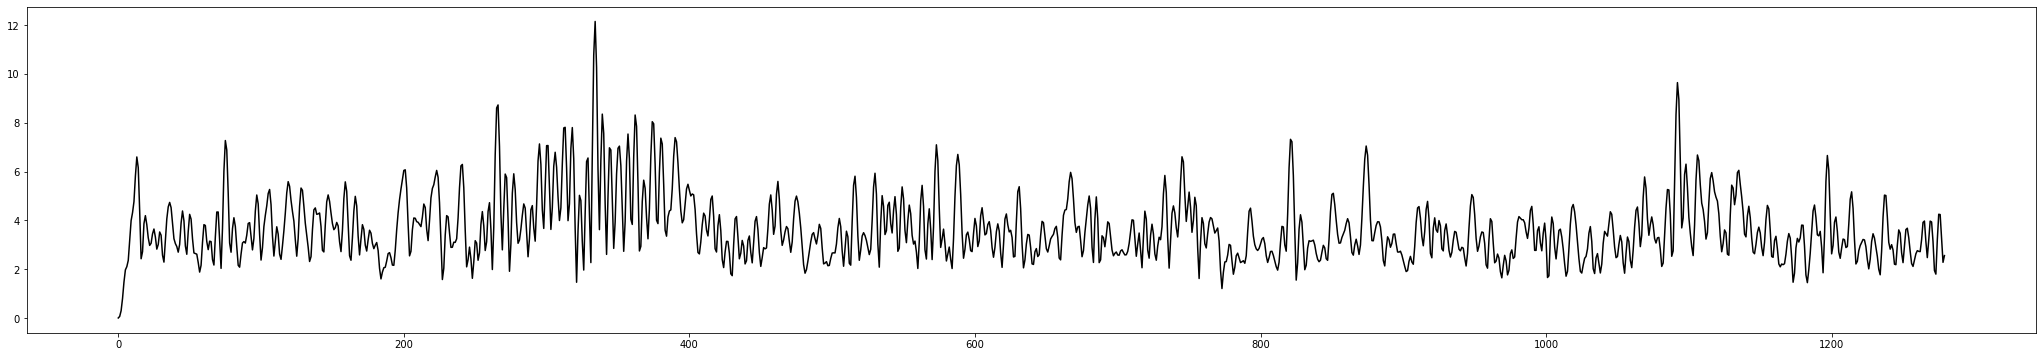

Cant peaks: 1306
(array([  13,   19,   25, ..., 7663, 7668, 7674]), {})
Sujeto: 12

 Período: 1


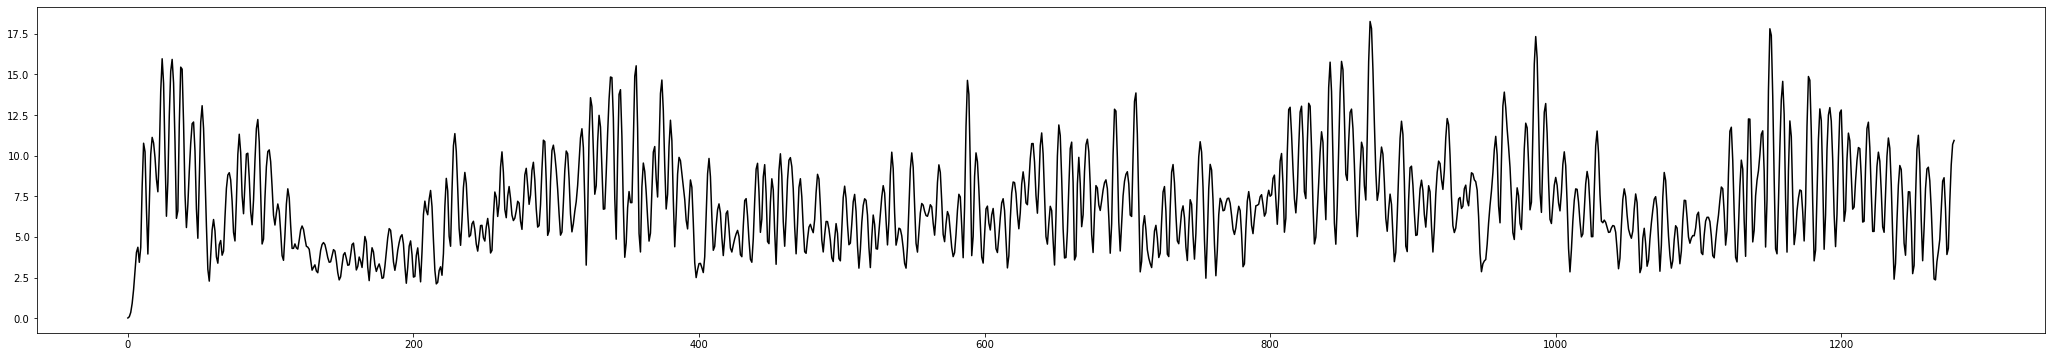

Cant peaks: 1166
(array([   7,   11,   17, ..., 7662, 7670, 7678]), {})
Sujeto: 13

 Período: 1


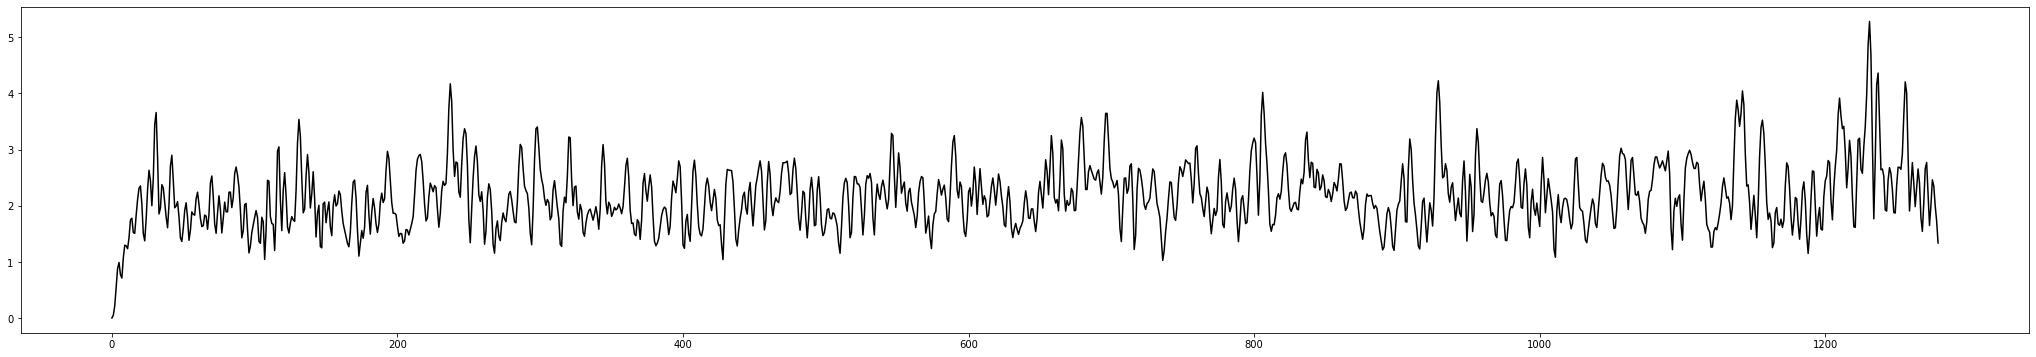

Cant peaks: 1364
(array([   5,    9,   14, ..., 7662, 7667, 7679]), {})


In [ ]:
import math

for sujeto in [8, 9, 10, 12, 13]:
  print(f"Sujeto: {sujeto}")

  for act in [1, 2]:
    print(f"\n Período: {act}")
    filename = f'/content/drive/MyDrive/procesados/suj_{sujeto}_bl_{act}.txt'

    datos   = pd.read_csv(filename, sep=',', header=None)
    EEGdata = datos.to_numpy()
    EEGdata = apply_filter(EEGdata)

    gfp = get_GFP(EEGdata)

    fig,ax=plt.subplots(ncols=1,figsize=(36,6))
    ax.plot(gfp[:1280],'k')
    plt.show()

    peaks = find_peaks(gfp)
    print("Cant peaks: {total}".format(total=len(peaks[0])))
    print(peaks)
    

In [ ]:
# inicio = 1
# fin    = 4
# xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
# fig,ax = plt.subplots(ncols=1,figsize=(16,8))
# #fig.suptitle('Series temporales (uV)')
# yticks=[]
# for c in np.arange(ch):
#     temp = EEGdata_filt[c,inicio*srate:fin*srate]
#     temp2=EEGdata[c,inicio*srate:fin*srate]
#     dmin=np.min(temp)
#     dmax=np.max(temp)
#     vmedio = np.mean([dmin,dmax])+30*c
#     yticks.append(vmedio)
#     ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'--r')
#     ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp2)+temp2,'k')
# ax.set_xlim([inicio*srate,fin*srate])
# ax.set_xticks(xticks)
# ax.set_xticklabels(np.arange(inicio,fin+1))
# ax.set_yticks(yticks)
# ax.set_yticklabels(mont1020_30.ch_names)
# ax.set_ylabel('channels')
# ax.set_xlabel('Time (s)')
  
# plt.show()